In [ ]:
import pandas as pd
import main

In [2]:
real_top = pd.read_csv('real_data_test\\top_df.csv', delimiter=';')
real_top = real_top.rename(columns={'WELL_NAME': 'WELL_NAME_UWI'})
del real_top['X']
del real_top['Y']
real_top['WELL_NAME_UWI'] = real_top['WELL_NAME_UWI'].astype('str')
real_top.head(n=2)

,WELL_NAME_UWI,DEPTH_TOP
0,100,2548.81
1,101,2556.23


In [3]:
real_bottom = pd.read_csv('real_data_test\\bottom_df.csv', delimiter=';')
real_bottom = real_bottom.rename(columns={'WELL_NAME': 'WELL_NAME_UWI'})
del real_bottom['X']
del real_bottom['Y']
real_bottom['WELL_NAME_UWI'] = real_bottom['WELL_NAME_UWI'].astype('str')
real_bottom.head(n=2)

,WELL_NAME_UWI,DEPTH_BOTTOM
0,100,2564.81
1,101,2571.71


In [4]:
# данные от организаторов
water_content_data = pd.read_csv(main.data_dir + "\\water_content.csv", delimiter=';')
water_content_data = water_content_data.rename(columns={'Скважина': main.keys_dict[main.kid_well]})
water_content_data = water_content_data.rename(columns={' Начальная обводненность ': 'WC'})
water_content_data = water_content_data.rename(columns={'Дата запуска': 'date_start'})
del water_content_data['date_start']
water_content_data = water_content_data.rename(columns={'well_name': 'WELL_NAME'})
water_content_data.head(n=5)
water_content_data['WELL_NAME'] = water_content_data['WELL_NAME'].astype('str')
water_content_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 2 columns):
WELL_NAME    181 non-null object
WC           181 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.9+ KB


In [5]:
print(len(water_content_data['WELL_NAME'].value_counts()))

180


In [6]:
las_out_file_name = 'AllGisParams\\fake_gis_las_all_out.csv'
global_data = pd.read_csv(las_out_file_name, delimiter=';')
global_data['WELL_NAME'] = global_data['WELL_NAME'].astype('str')
global_data['WELL_NAME_UWI'] = global_data['WELL_NAME_UWI'].astype('str')

In [7]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (-1, 1))
las_data = global_data[global_data['WELL_NAME'] == '300']
las_data = las_data['GZ7']
las_data = las_data.dropna()
las_data = scaler.fit_transform(las_data)
las_data

D:\libs\Anaconda\3.3\envs\aind\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\libs\Anaconda\3.3\envs\aind\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


array([-0.85573923, -0.87270766, -0.88967608, ..., -0.96752092,
       -0.9676667 , -0.96781247])

In [8]:
#params_name = ['KINT', 'R05', 'R20', 'R14', 'R10', 'F07', 'F10', 'F14', 'R07', 'F20', 'F05', 'PHIT', 'MRES', 'SG', 'KGL', 'SXWB', 'GZ3', 'NPHI', 'GZ2', 'GZ4', 'GZ1', 'CILD', 'PROX', 'LLD', 'GZ7', 'APS', 'KPS', 'GZ5']
#params_name = ['CILD', 'GZ7', 'KINT']
#params_name = ['KINT', 'R05', 'R20', 'R14', 'R10', 'F07', 'F10', 'F14', 'R07', 'F20', 'F05', 'PHIT', 'MRES', 'SG', 'KGL', 'SXWB', 'GZ3', 'NPHI', 'GZ2', 'GZ4', 'GZ1', 'CILD', 'PROX', 'LLD', 'GZ7', 'GR:2', 'GR:1', 'APS', 'KPS', 'GZ5', 'SP:1', 'SP:2', 'W:1', 'W:2', 'NKTM:2', 'NKTM:1', 'CFTC:1', 'CFTC:2', 'MLM:2', 'MLM:1', 'RT:1', 'RT:2', 'GR:3']
params_name = ['R05', 'R14']

In [ ]:
#param = 'KINT'
# las_data = global_data[['WELL_NAME', 'WELL_NAME_UWI', 'DEPT', param]].copy()
# las_data['WELL_NAME'] = las_data['WELL_NAME'].astype('str')
# las_data['WELL_NAME_UWI'] = las_data['WELL_NAME_UWI'].astype('str')
# las_data = las_data.dropna()

In [9]:
# объединение данных по всем параметрам
min_count_val_in_data = 10
count_val = 100


# Загружаем данные по параметру
# las_gis_file_name = 'AllGisParams\\fake_gis_las_' + param_name_file +  '_out.csv'
# las_data = pd.read_csv(las_gis_file_name, delimiter=';', low_memory=False)
print('Start union table')
all_params = ['WELL_NAME', 'WELL_NAME_UWI', 'DEPT']
all_params.extend(params_name)
las_data = global_data[all_params].copy()
las_data['WELL_NAME'] = las_data['WELL_NAME'].astype('str')
las_data['WELL_NAME_UWI'] = las_data['WELL_NAME_UWI'].astype('str')
las_data.head(n=5)

# Объединяем данные
real_data = pd.merge(water_content_data, las_data, on='WELL_NAME')
real_data = pd.merge(real_data, real_top, on='WELL_NAME_UWI')
real_data = pd.merge(real_data, real_bottom, on='WELL_NAME_UWI')
real_data_na = real_data.dropna()
print(len(real_data['WELL_NAME'].value_counts()))

# Преобразуем в данные для обучения
dev_path = "..\\tasks\\task 6\\data\\dev\\"
well_name_list = real_data_na['WELL_NAME_UWI'].value_counts().index.tolist()

x_values = []
for param in params_name:
    params_name_file = (param.replace(':','')).lower()
    print('Convert ', param, 'start')

#     [x_values_temp, y_values, y_names] = main.ConvertDataToLearningByStdParams(real_data_na, param, dev_path,
#                                                            min_count_val_in_data)
    [x_values_temp, y_values, y_names] = main.ConvertDataToLearning(real_data_na, param, dev_path,
                                                               min_count_val_in_data, count_val)
    if (len(x_values) > 0):
        for src, res in zip(x_values_temp, x_values):
            res.extend(src)
            #print('res = ',len(res), 'src = ', len(src))
    else:
        x_values = x_values_temp.copy()
                
    print('length =', len(x_values), len(y_values), len(x_values[0]))
    

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import cross_val_score

y_values_r = y_values
x_train, x_hold, y_train, y_hold = train_test_split(x_values, y_values_r, test_size=0.3, random_state=17)
# обучаем дерево
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score

forest = RandomForestRegressor(n_estimators=10, n_jobs=---1, random_state=17) # n_jobs=-1
# print(np.mean(cross_val_score(forest, x_hold, y_hold, cv=6))) # 0.949


forest_params = { 
    'max_depth': [1, 10, 20, 40, 60],
    'n_estimators': [1, 10, 30, 50, 100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2']
}

print('Start', param, ' learning')
forest_grid = GridSearchCV(forest, forest_params, cv=5, n_jobs=-1, verbose=True)
forest_grid.fit(x_train, y_train) 
print('Convert all_params end')
print(len(x_values))

Start union table
157
Convert  R05 start
0  of  155
20  of  155
40  of  155
60  of  155
80  of  155
100  of  155
120  of  155
140  of  155
end ConvertDataToLearning
length = 152 152 100
Convert  R14 start
0  of  155
20  of  155
40  of  155
60  of  155
80  of  155
100  of  155
120  of  155
140  of  155
end ConvertDataToLearning
length = 152 152 200


D:\libs\Anaconda\3.3\envs\aind\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Start R14  learning
Fitting 5 folds for each of 105 candidates, totalling 525 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   32.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 525 out of 525 | elapsed:  1.6min finished


Convert all_params end
152


In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

def data_analize_func(predict_for_analize, file_name = ''):
    # подготовка данных
    data_for_analize = predict_for_analize.sort_values(by=['y_hold'])
    data_for_analize['x_axis'] = [x for x in range(len(predict_for_analize['y_hold']))]
    data_for_analize.head()
    if file_name != '':
        data_for_analize.to_csv('AllGisParams/' + file_name, index=False, sep = ';')
    
    # построение графиков
    plt.scatter(data_for_analize['x_axis'], data_for_analize['y_predict'], color = 'blue')
    plt.scatter(data_for_analize['x_axis'], data_for_analize['y_hold'], color = 'red')
    plt.show()
    
    # regression metrics
    print('MSE                      = '+ str(mean_squared_error(data_for_analize['y_hold'], 
                                                                data_for_analize['y_predict'])))
    print('MAE                      = '+ str(mean_absolute_error(data_for_analize['y_hold'], 
                                                                 data_for_analize['y_predict'])))
    print('r2_score                 = '+ str(r2_score(data_for_analize['y_hold'], 
                                                      data_for_analize['y_predict'])) + '    (best_value is 1)')
    print('explained_variance_score = '+ str(explained_variance_score(data_for_analize['y_hold'], 
                                                                      data_for_analize['y_predict'])) + '    (best_value is 1)')

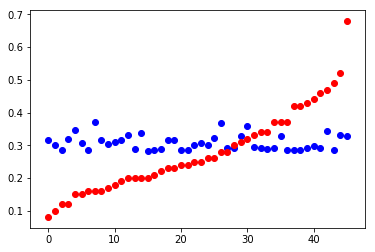

MSE                      = 0.0174912519183
MAE                      = 0.112731057132
r2_score                 = -0.102040794385    (best_value is 1)
explained_variance_score = -0.0510338347785    (best_value is 1)


In [11]:
predict_for_analize_fake = pd.DataFrame({'y_hold':y_hold, 'y_predict':forest_grid.predict(x_hold)})
data_analize_func(predict_for_analize_fake)
#predict_for_analize_fake.to_csv('AllGisParams/result_predict_sum.csv',index=False, sep = ';')

In [17]:
# проверка по каждому параметру
#params_name = ['KINT', 'R05', 'R20', 'R14', 'R10', 'F07', 'F10', 'F14', 'R07', 'F20', 'F05', 'PHIT', 'MRES', 'SG', 'KGL', 'SXWB', 'GZ3', 'NPHI', 'GZ2', 'GZ4', 'GZ1', 'CILD', 'PROX', 'LLD', 'GZ7', 'APS', 'KPS', 'GZ5']
params_name = ['R14']
result_mse = {}.fromkeys(params_name, 0)
result_mae= {}.fromkeys(params_name, 0)
result_r2 = {}.fromkeys(params_name, 0)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
count_val = 500
min_count_val_in_data = 10
for param in params_name:
    print('Convert ', param, 'start')
    param_name_file = (param.replace(':','')).lower()
    # Загружаем данные по параметру
    # las_gis_file_name = 'AllGisParams\\fake_gis_las_' + param_name_file +  '_out.csv'
    # las_data = pd.read_csv(las_gis_file_name, delimiter=';', low_memory=False)
    las_data = global_data[['WELL_NAME', 'WELL_NAME_UWI', 'DEPT', param]].copy()
    las_data['WELL_NAME'] = las_data['WELL_NAME'].astype('str')
    las_data['WELL_NAME_UWI'] = las_data['WELL_NAME_UWI'].astype('str')
    las_data.head(n=5)
    
    # Объединяем данные
    real_data = pd.merge(water_content_data, las_data, on='WELL_NAME')
    real_data = pd.merge(real_data, real_top, on='WELL_NAME_UWI')
    real_data = pd.merge(real_data, real_bottom, on='WELL_NAME_UWI')
    real_data_na = real_data.dropna()
    print(len(real_data['WELL_NAME'].value_counts()))
    
    # Преобразуем в данные для обучения
    dev_path = "..\\tasks\\task 6\\data\\dev\\"
    well_name_list = real_data_na['WELL_NAME_UWI'].value_counts().index.tolist()
    [x_values, y_values, y_names] = main.ConvertDataToLearning(real_data_na, param, dev_path,
                                                               min_count_val_in_data, count_val)
    
    # y_values_r = [int(10 * y_val) for y_val in y_values]
    y_values_r = y_values
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import train_test_split, StratifiedKFold
    from sklearn.metrics import accuracy_score
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.cross_validation import cross_val_score

    x_train, x_hold, y_train, y_hold = train_test_split(x_values, y_values_r, test_size=0.3, random_state=17)
    # обучаем дерево
    # from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import RandomForestRegressor
    
    from sklearn.model_selection import GridSearchCV, cross_val_score
#     forest = RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=17)
#         forest_params = { 
#         'max_depth': [1, 10, 20, 40, 60],
#         'n_estimators': [1, 10, 30, 50, 100, 200, 500],
#         'max_features': ['auto', 'sqrt', 'log2']
#     }
#     print('Start', param, ' learning')
#     forest_grid = GridSearchCV(forest, forest_params, cv=5, n_jobs=-1, verbose=True)
#     forest_grid.fit(x_train, y_train) 
#      #result_fit = accuracy_score(y_hold, forest_grid.predict(x_hold))
#     y_predict = forest_grid.predict(x_hold) 
    
    from sklearn.ensemble import GradientBoostingRegressor
    boost = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01, 
                                           max_depth=2, random_state=17, loss='ls')
    boost.fit(x_train, y_train)
    y_predict = boost.predict(x_hold) 
    # print(np.mean(cross_val_score(forest, x_hold, y_hold, cv=6))) # 0.949




  

   
    
   
    mse = mean_squared_error(y_hold, y_predict)
    mae = mean_absolute_error(y_hold, y_predict)
    # r2_score =  r2_score(y_hold, y_predict)

    result_mse[param] = mse
    result_mae[param] = mae
    #result_r2[param] = r2_score
    print('result_mse = ', 100. * mse)
    #print('best_params', forest_grid.best_params_)
    print('Convert', param, 'end')
print('End calculate, l_values_len = ', len(x_values))

Convert  R14 start
157
0  of  155
20  of  155
40  of  155
60  of  155
80  of  155
100  of  155
120  of  155
140  of  155
end ConvertDataToLearning
result_mse =  2.34897733235
Convert R14 end
End calculate, l_values_len =  152


In [18]:
result_mae

{'R14': 0.12287746059091365}

In [15]:
predict_for_analize_fake = pd.DataFrame({'y_hold':y_hold, 'y_predict':y_predict})
data_analize_func(predict_for_analize_fake)
predict_for_analize_fake.to_csv('AllGisParams/result_predict_sum_r05.csv',index=False, sep = ';')

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [ ]:
predict_for_analize_mae = pd.DataFrame(list(result_mae.items()), columns=['Param', 'Mae'])
predict_for_analize_mae.to_csv('AllGisParams/result_mae(count = 500).csv',index=False, sep = ';')
predict_for_analize_mse = pd.DataFrame(list(result_mse.items()), columns=['Param', 'Mse'])
predict_for_analize_mse.to_csv('AllGisParams/result_mse(count = 500).csv',index=False, sep = ';')




In [ ]:
#result_learning.items()
result_data = pd.DataFrame(list(result_learning.items()), columns=['Param', 'Result'])

In [ ]:
result_data.to_csv('AllGisParams/result_learning_std.csv',index=False, sep = ';')

In [ ]:
# Создаем DataFrame
# x_names = ['idx' + str(i) for i in range(len(x_values[0]))]
# data_x_values = pd.DataFrame(x_values, columns = x_names)
# data_y_values = pd.DataFrame(y_values, columns=['wc'])
# data_names = pd.DataFrame(y_names, columns=['WELL_NAME'])
# len(data_x_values)
# data_values = pd.merge(data_y_values, data_names, left_index=True, right_index=True)
# data_values = pd.merge(data_values, data_x_values, left_index=True, right_index=True)

In [ ]:
data_values.head()